# General Info, Installing and Loading packages 

In [ ]:
%%info

In [ ]:
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1581382623432_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
absl-py                    0.8.1  
astor                      0.8.0  
beautifulsoup4             4.8.1  
bleach                     3.1.0  
boto                       2.49.0 
funcsigs                   1.0.2  
gast                       0.3.2  
google-pasta               0.1.7  
grpcio                     1.24.3 
html5lib                   1.0.1  
jmespath                   0.9.4  
Keras-Applications         1.0.6  
Keras-Preprocessing        1.0.5  
lxml                       4.4.2  
Markdown                   3.1.1  
mysqlclient                1.4.6  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pip                        20.0.2 
protobuf                   3.10.0 
py-dateutil                2.2    
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
setuptools                 45.2.0 
six                 

In [ ]:
sc.install_pypi_package("pandas==0.25.1") #Install pandas version 0.25.1 
sc.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
absl-py                    0.8.1  
astor                      0.8.0  
beautifulsoup4             4.8.1  
bleach                     3.1.0  
boto                       2.49.0 
cycler                     0.10.0 
funcsigs                   1.0.2  
gast                       0.3.2  
google-pasta               0.1.7  
grpcio                     1.24.3 
html5lib                   1.0.1  
jmespath                   0.9.4  
Keras-Applications         1.0.6  
Keras-Preprocessing        1.0.5  
kiwisolver                 1.1.0  
lxml                       4.4.2  
Markdown                   3.1.1  
matplotlib                 3.1.3  
mysqlclient                1.4.6  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pandas                     0.25.1 
pip                        20.0.2 
protobuf                   3.10.0 
py-dateutil                2.2    
pyparsing           

In [ ]:
sc.install_pypi_package("keras==2.3.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer,VectorAssembler, VectorIndexer 
from pyspark.ml.feature import  StringIndexer, OneHotEncoder
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder, CrossValidatorModel
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, mean, min, max
from pyspark.sql import functions as F  
from pyspark.sql import Window



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load the data

In [ ]:
df = spark.read.format("csv").option("header","true").load('s3://bigdataclass2/adult.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
df.count(), df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(32561, ['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income'])

# Exploratory Data Analysis

In [ ]:
df.select(['Age', 'workclass', 'education-num', 'hours-per-week', 'capital-gain', 'race'])
        .describe()
        .show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------+-----------------+------------------+------------------+-------------------+
|summary|               Age|   workclass|    education-num|    hours-per-week|      capital-gain|               race|
+-------+------------------+------------+-----------------+------------------+------------------+-------------------+
|  count|             32561|       32561|            32561|             32561|             32561|              32561|
|   mean| 38.58164675532078|        null| 10.0806793403151|40.437455852092995|1077.6488437087312|               null|
| stddev|13.640432553581356|        null|2.572720332067397|12.347428681731838| 7385.292084840354|               null|
|    min|                17|           ?|                1|                 1|                 0| Amer-Indian-Eskimo|
|    max|                90| Without-pay|                9|                99|             99999|              White|
+-------+------------------+------------+---------------

In [ ]:
top_workclass = df.groupBy('workclass') \
                       .count().orderBy('count', ascending=False) \
                       .limit(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
top_workclass.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+
|        workclass|count|
+-----------------+-----+
|          Private|22696|
| Self-emp-not-inc| 2541|
|        Local-gov| 2093|
|                ?| 1836|
|        State-gov| 1298|
|     Self-emp-inc| 1116|
|      Federal-gov|  960|
|      Without-pay|   14|
|     Never-worked|    7|
+-----------------+-----+

In [ ]:
top_work = df.groupBy('workclass', 'sex') \
           .count().join(top_workclass, ['workclass'], 'leftsemi') \
           .orderBy('count', ascending=False) 
top_work.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-------+-----+
|workclass        |sex    |count|
+-----------------+-------+-----+
| Private         | Male  |14944|
| Private         | Female|7752 |
| Self-emp-not-inc| Male  |2142 |
| Local-gov       | Male  |1258 |
| ?               | Male  |997  |
| Self-emp-inc    | Male  |981  |
| ?               | Female|839  |
| Local-gov       | Female|835  |
| State-gov       | Male  |809  |
| Federal-gov     | Male  |645  |
| State-gov       | Female|489  |
| Self-emp-not-inc| Female|399  |
| Federal-gov     | Female|315  |
| Self-emp-inc    | Female|135  |
| Without-pay     | Male  |9    |
| Without-pay     | Female|5    |
| Never-worked    | Male  |5    |
| Never-worked    | Female|2    |
+-----------------+-------+-----+

### Using windows function

In [ ]:
from pyspark.sql import Row

row = Row("Customer_id", "Day", "Purchases")
df5 = sc.parallelize([
    row(1, "2020-01-01", 20.0),
    row(1, "2020-01-06", 10.0),
    row(1, "2020-01-09", 25.0),
    row(1, "2020-01-22", 100.0),
    row(2, "2020-01-01", 5.0),
    row(2, "2020-01-03", 40.0),
    row(2, "2020-02-11", 20.0),
    row(3, "2020-01-01", 60.0), row(3, "2020-01-02", 100.50), row(3, "2020-01-04", 15.0), row(3, "2020-01-06", 15.0),
]).toDF().withColumn("Day", col("Day").cast("date"))

df5.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+----------+---------+
|Customer_id|       Day|Purchases|
+-----------+----------+---------+
|          1|2020-01-01|     20.0|
|          1|2020-01-06|     10.0|
|          1|2020-01-09|     25.0|
|          1|2020-01-22|    100.0|
|          2|2020-01-01|      5.0|
|          2|2020-01-03|     40.0|
|          2|2020-02-11|     20.0|
|          3|2020-01-01|     60.0|
|          3|2020-01-02|    100.5|
|          3|2020-01-04|     15.0|
|          3|2020-01-06|     15.0|
+-----------+----------+---------+

In [ ]:
days = lambda i: i * 86400

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
windows = (Window()
   .partitionBy(F.col("Customer_id"))
   .orderBy(col("Day").cast("timestamp").cast("long"))
   .rangeBetween(-days(7), 0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
df5.withColumn("Purchase_List", F.collect_list("Purchases").over(windows)
              ).select(F.col("*"), F.mean("Purchases").over(windows).alias("mean Purchases")).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+----------+---------+-------------------------+--------------+
|Customer_id|Day       |Purchases|Purchase_List            |mean Purchases|
+-----------+----------+---------+-------------------------+--------------+
|1          |2020-01-01|20.0     |[20.0]                   |20.0          |
|1          |2020-01-06|10.0     |[20.0, 10.0]             |15.0          |
|1          |2020-01-09|25.0     |[10.0, 25.0]             |17.5          |
|1          |2020-01-22|100.0    |[100.0]                  |100.0         |
|3          |2020-01-01|60.0     |[60.0]                   |60.0          |
|3          |2020-01-02|100.5    |[60.0, 100.5]            |80.25         |
|3          |2020-01-04|15.0     |[60.0, 100.5, 15.0]      |58.5          |
|3          |2020-01-06|15.0     |[60.0, 100.5, 15.0, 15.0]|47.625        |
|2          |2020-01-01|5.0      |[5.0]                    |5.0           |
|2          |2020-01-03|40.0     |[5.0, 40.0]              |22.5          |
|2          

In [ ]:
df.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income']

In [ ]:
# 
nums = df.groupBy(['race', 'sex']).count().orderBy('race').toPandas()



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
nums

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                  race      sex  count
0   Amer-Indian-Eskimo   Female    119
1   Amer-Indian-Eskimo     Male    192
2   Asian-Pac-Islander     Male    693
3   Asian-Pac-Islander   Female    346
4                Black   Female   1555
5                Black     Male   1569
6                Other   Female    109
7                Other     Male    162
8                White     Male  19174
9                White   Female   8642

In [ ]:
import matplotlib.pyplot as plt
#plt.clf()
nums.plot.barh(stacked=False, x='race',y='count', figsize=(14,6), legend = None)
#plt.xticks(nums['count'])
plt.xlim(0, 20000)
plt.title('Counts per Race by Gender')
plt.xlabel('Count')
plt.ylabel('Race/Gender')
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

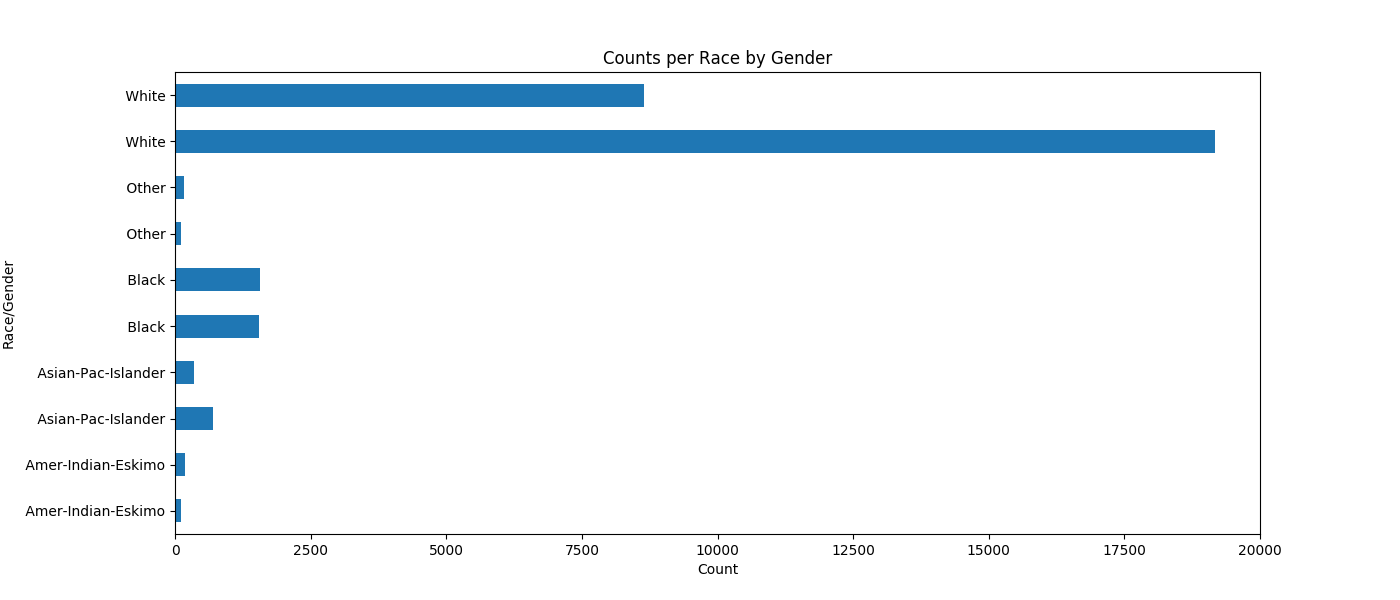

In [ ]:
%matplot plt

In [ ]:
DF = df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
DF.groupby(['race', 'sex']).size().unstack().plot(kind='bar',stacked=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

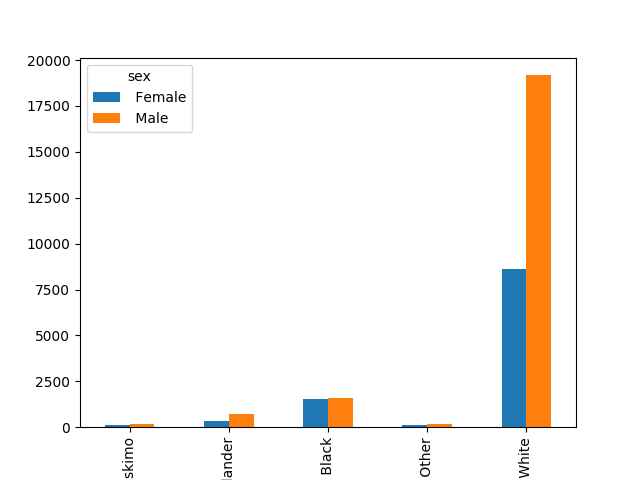

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 6]
%matplot plt

# Machine Learning Problem

In this example we want to use the Adult data set to build a model that will, given all the other attributes, predict whether an individual will earn more or less than 50K a year. This is a classification problem. 

This dataset, together with all its descriptions, is publicly available at UCI ML repository 
https://archive.ics.uci.edu/ml/datasets/Adult



# 1. Prepare data for ML

In [ ]:
df.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Age', 'string'), ('workclass', 'string'), ('fnlwgt', 'string'), ('education', 'string'), ('education-num', 'string'), ('marital-status', 'string'), ('occupation', 'string'), ('relationship', 'string'), ('race', 'string'), ('sex', 'string'), ('capital-gain', 'string'), ('capital-loss', 'string'), ('hours-per-week', 'string'), ('native-country', 'string'), ('Income', 'string')]

In [ ]:
from pyspark.sql.types import IntegerType
df = df.withColumn("Age", df["Age"].cast(IntegerType()))\
       .withColumn("fnlwgt", df["fnlwgt"].cast(IntegerType()))\
       .withColumn("education-num", df["education-num"].cast(IntegerType()))\
       .withColumn("capital-gain", df["capital-gain"].cast(IntegerType()))\
       .withColumn("capital-loss", df["capital-loss"].cast(IntegerType()))\
       .withColumn("hours-per-week", df["hours-per-week"].cast(IntegerType()))
        

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

A. Convert all the string fields to numeric ones by using the StringIndexer transformer.

In [ ]:
stringIndexer_label = StringIndexer(inputCol="Income", outputCol="Label")

strIndexer_workclass = StringIndexer(inputCol="workclass", outputCol="workclass_IX")
strIndexer_edu = StringIndexer(inputCol="education", outputCol="education_IX")
strIndexer_ms = StringIndexer(inputCol='marital-status', outputCol="marital-status_IX")
strIndexer_occ = StringIndexer(inputCol="occupation", outputCol="occupation_IX")
strIndexer_rela = StringIndexer(inputCol="relationship", outputCol="relationship_IX")
strIndexer_race = StringIndexer(inputCol="race", outputCol="race_IX")
strIndexer_sex = StringIndexer(inputCol="sex", outputCol="sex_IX")
strIndexer_nc = StringIndexer(inputCol="native-country", outputCol="native-country_IX")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

B. One Hot encoding

In [ ]:
OneHot_workclass = OneHotEncoder(inputCol="workclass_IX", outputCol="workclass_Vec")
OneHot_edu = OneHotEncoder(inputCol="education_IX", outputCol="education_Vec")
OneHot_ms = OneHotEncoder(inputCol='marital-status_IX', outputCol="marital-status_Vec")
OneHot_occ = OneHotEncoder(inputCol="occupation_IX", outputCol="occupation_Vec")
OneHot_rela = OneHotEncoder(inputCol="relationship_IX", outputCol="relationship_Vec")
OneHot_race = OneHotEncoder(inputCol="race_IX", outputCol="race_Vec")
OneHot_sex = OneHotEncoder(inputCol="sex_IX", outputCol="sex_Vec")
OneHot_nc = OneHotEncoder(inputCol="native-country_IX", outputCol="native-country_Vec")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

C. Create a feature vector by combining all features together.

In [ ]:
VA_features = VectorAssembler(inputCols=["workclass_Vec", 'education_Vec', 'marital-status_Vec', 
                                         "occupation_Vec", "relationship_Vec", "race_Vec",
                                         "sex_Vec", "native-country_Vec", 
                                         'Age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
                                         'hours-per-week',], outputCol="Features")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Build a Pipeline!

In [ ]:
pipe = Pipeline(stages=[stringIndexer_label, strIndexer_workclass, strIndexer_edu, strIndexer_ms, strIndexer_occ, 
                        strIndexer_rela, strIndexer_race, strIndexer_sex, strIndexer_nc, 
                        OneHot_workclass, OneHot_edu, OneHot_ms, OneHot_occ, OneHot_rela, OneHot_race, OneHot_sex,
                        OneHot_nc, 
                        VA_features]
               )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
pipedModel = pipe.fit(df)
dfTransformed = pipedModel.transform(df)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
dfTransformed.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Income', 'Label', 'workclass_IX', 'education_IX', 'marital-status_IX', 'occupation_IX', 'relationship_IX', 'race_IX', 'sex_IX', 'native-country_IX', 'workclass_Vec', 'education_Vec', 'marital-status_Vec', 'occupation_Vec', 'relationship_Vec', 'race_Vec', 'sex_Vec', 'native-country_Vec', 'Features']

In [ ]:
dfTransformed.select(['Features', 'Label']).show(5, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------------------------------------------------------------------------------------------------+-----+
|Features                                                                                                     |Label|
+-------------------------------------------------------------------------------------------------------------+-----+
|(100,[4,10,24,32,44,48,52,53,94,95,96,97,99],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,39.0,77516.0,13.0,2174.0,40.0])|0.0  |
|(100,[1,10,23,31,43,48,52,53,94,95,96,99],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.0,83311.0,13.0,13.0])          |0.0  |
|(100,[0,8,25,38,44,48,52,53,94,95,96,99],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0,215646.0,9.0,40.0])           |0.0  |
|(100,[0,13,23,38,43,49,52,53,94,95,96,99],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,53.0,234721.0,7.0,40.0])          |0.0  |
|(100,[0,10,23,29,47,49,62,94,95,96,99],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,28.0,338409.0,13.0,40.0])                |0.0  |
+-------------------------------------------------------

In [ ]:
df.select(['Age', 'fnlwgt', 'education-num']).show(5, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+------+-------------+
|Age|fnlwgt|education-num|
+---+------+-------------+
|39 |77516 |13           |
|50 |83311 |13           |
|38 |215646|9            |
|53 |234721|7            |
|28 |338409|13           |
+---+------+-------------+
only showing top 5 rows

### Split data into training and testing

In [ ]:
print('\nSplit dataset into training and testing sets...')
training, testing = dfTransformed.select(["Label", "Features"]).randomSplit([0.7, 0.3])

### Split data, randomly, into training and test sets. Stratified sampling highly recommended,for skewed data

# training, testing = data.randomSplit([0.7, 0.3])
# #print len(training)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


Split dataset into training and testing sets...

## Load ML libraries

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier as   DT      # decision tree
from pyspark.ml.classification import RandomForestClassifier, RandomForestClassificationModel              # Random Forest, ofcourse
from pyspark.ml.classification import MultilayerPerceptronClassifier      # feedforward artificial neural network
from pyspark.ml.classification import GBTClassifier                       # gradient-boosted tree 
from pyspark.ml.classification import NaiveBayes                          # naive bayes
from pyspark.ml.classification import MultilayerPerceptronClassificationModel 
from pyspark.ml.classification import LogisticRegression                 # logistic regression

from pyspark.ml.regression import LinearRegression                       # Regression problem
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.regression import RandomForestRegressor 
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.regression import GeneralizedLinearRegression

from pyspark.ml.feature import PCA                                       # Principal Components Analysis 
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.classification import LogisticRegressionModel


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Model 1: Random Forest

#### Define the model

In [ ]:

RF = RandomForestClassifier(labelCol="Label", featuresCol="Features")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

#### Fit/train the model

In [ ]:

modelRF = RF.fit(training)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
## Make predictions
predictions = modelRF.transform(testing)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
predictions.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Label', 'Features', 'rawPrediction', 'probability', 'prediction']

#### Evaluation

In [ ]:
preds = predictions.select(['Label', 'prediction'])
print ('='*100)
print ('Confusion Matrix::')
print ('\n')
preds.crosstab('label', 'prediction').show(truncate = False)
print ('='*100)
print ('\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Confusion Matrix::


+----------------+----+---+
|label_prediction|0.0 |1.0|
+----------------+----+---+
|1.0             |1622|824|
|0.0             |7259|146|
+----------------+----+---+


Other Metrics

In [ ]:
# f1|precision|recall|weightedPrecision|weightedRecall
evaluatorRF = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="weightedPrecision")
accuracy = evaluatorRF.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='f1')  
F1_score = evaluator.evaluate(predictions)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='weightedRecall')  
recall = evaluator.evaluate(predictions)

print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))
print('The F1 Score = %g' % F1_score)
print('Recall = %g' % recall)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy = 0.825339
Test Error = 0.174661
The F1 Score = 0.789885
Recall = 0.820526

## Model 2: Logistic Regression

In [ ]:
## Define the model
lr = LogisticRegression(labelCol="Label", featuresCol="Features")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
## fit the model
lrModel = lr.fit(training)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
## Make predictions
predLR = lrModel.transform(testing)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
preds = predLR.select(['label', 'prediction'])
print ('='*100)
print ('Confusion Matrix::')
print ('\n')
preds.crosstab('label', 'prediction').show(truncate = False)
print ('='*100)
print ('\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Confusion Matrix::


+----------------+----+----+
|label_prediction|0.0 |1.0 |
+----------------+----+----+
|1.0             |994 |1452|
|0.0             |6913|492 |
+----------------+----+----+


In [ ]:
evaluatorRF = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="weightedPrecision")
accuracy = evaluatorRF.evaluate(predLR)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='f1')  
F1_score = evaluator.evaluate(predLR)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='weightedRecall')  
recall = evaluator.evaluate(predLR)

print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))
print('The F1 Score = %g' % F1_score)
print('Recall = %g' % recall)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy = 0.842661
Test Error = 0.157339
The F1 Score = 0.843
Recall = 0.849152

In [ ]:
# print (lr.explainParams())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Model Tuning

In [ ]:
print (RF.explainParams())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [ ]:
## define parameter grid
Grid =( ParamGridBuilder()
       .addGrid(RF.maxDepth, [4, 5])
       .addGrid(RF.maxBins, [14])
       .addGrid(RF.numTrees, [10, 15])
       .addGrid(RF.impurity, ['entropy', 'gini'])
       .build())



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
evals = MulticlassClassificationEvaluator( labelCol = 'Label', predictionCol = 'prediction', metricName = 'weightedPrecision')
crossval = CrossValidator(estimator=RF,
                          estimatorParamMaps= Grid,
                          evaluator= evals,
                          numFolds= 3) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# fit a cross validated model
cvModel = crossval.fit(training)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
bestModel = cvModel.bestModel
bestModel

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

RandomForestClassificationModel (uid=RandomForestClassifier_677b3f0d6f9a) with 10 trees

In [ ]:
cvPredictions = cvModel.transform(testing)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
predCV = cvPredictions.select(['label', 'prediction'])
print ('='*100)
print ('Confusion Matrix::')
print ('\n')
predCV.crosstab('label', 'prediction').show(truncate = False)
print ('='*100)
print ('\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Confusion Matrix::


+----------------+----+---+
|label_prediction|0.0 |1.0|
+----------------+----+---+
|1.0             |1628|818|
|0.0             |7220|185|
+----------------+----+---+


In [ ]:

evaluatorRF = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="weightedPrecision")
accuracy = evaluatorRF.evaluate(cvPredictions)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='f1')  
F1_score = evaluator.evaluate(cvPredictions)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='weightedRecall')  
recall = evaluator.evaluate(cvPredictions)

print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))
print('The F1 Score = %g' % F1_score)
print('Recall = %g' % recall)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy = 0.815892
Test Error = 0.184108
The F1 Score = 0.785628
Recall = 0.815958

Tune Logistic Regression Model

In [ ]:
print(lr.explainParams())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features, current: Features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label, current: Label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The

In [ ]:
## define parameter grid
Grid =( ParamGridBuilder()
       .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
       .addGrid(lr.regParam, [0.01, 0.5])
       .addGrid(lr.maxIter, [10])
       .build())



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
evals = MulticlassClassificationEvaluator( labelCol = 'Label', predictionCol = 'prediction', metricName = 'weightedPrecision')
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps= Grid,
                          evaluator= evals,
                          numFolds= 3) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
# fit a cross validated model
cvModel = crossval.fit(training)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
bestModel = cvModel.bestModel
bestModel

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

LogisticRegressionModel: uid = LogisticRegression_92855f779520, numClasses = 2, numFeatures = 100

In [ ]:
cvPredictions = cvModel.transform(testing)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
predCV = cvPredictions.select(['label', 'prediction'])
print ('='*100)
print ('Confusion Matrix::')
print ('\n')
predCV.crosstab('label', 'prediction').show(truncate = False)
print ('='*100)
print ('\n')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Confusion Matrix::


+----------------+----+----+
|label_prediction|0.0 |1.0 |
+----------------+----+----+
|1.0             |1077|1369|
|0.0             |6953|452 |
+----------------+----+----+


In [ ]:

evaluatorLR = MulticlassClassificationEvaluator(labelCol="Label", predictionCol="prediction", metricName="weightedPrecision")
accuracy = evaluatorLR.evaluate(cvPredictions)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='f1')  
F1_score = evaluator.evaluate(cvPredictions)

evaluator = MulticlassClassificationEvaluator(labelCol='Label', predictionCol='prediction', metricName='weightedRecall')  
recall = evaluator.evaluate(cvPredictions)

print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))
print('The F1 Score = %g' % F1_score)
print('Recall = %g' % recall)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy = 0.837549
Test Error = 0.162451
The F1 Score = 0.836563
Recall = 0.844787